# Downsampled Cellpose Segmentation on human protein atlas images

In [1]:
import os
from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import CytosolSegmentationDownsamplingCellpose
from scportrait.pipeline.selection import LMDSelection
import scportrait

In [2]:
project_location = "project_downsampling"
config_path = scportrait.data.get_config_file(config_id = "dataset_2_config")
project = Project(
    os.path.abspath(project_location),
    config_path=config_path,
    overwrite=True,
    debug=True,
    segmentation_f=CytosolSegmentationDownsamplingCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[10/04/2025 20:17:40] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/config.yml
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampli
         ng/scportrait.sdata                                                                                       
[10/04/2025 20:17:40] Compression algorithm for extracted single-cell images: lzf
[10/04/2025 20:17:40] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2.
[10/04/2025 20:17:40] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2.


In [3]:
dataset_2_path = scportrait.data.dataset_2()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_2_path}/Ch1.tif", f"{dataset_2_path}/Ch2.tif", f"{dataset_2_path }/Ch3.tif"]

project.load_input_from_tif_files(images, channel_names = ["Channel1", "Channel2", "Channel3"])

[10/04/2025 20:17:40] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/Project_xnec8qrg for Project
[10/04/2025 20:17:41] Image input_image written to sdata object.
[10/04/2025 20:17:41] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/Project_xnec8qrg'>


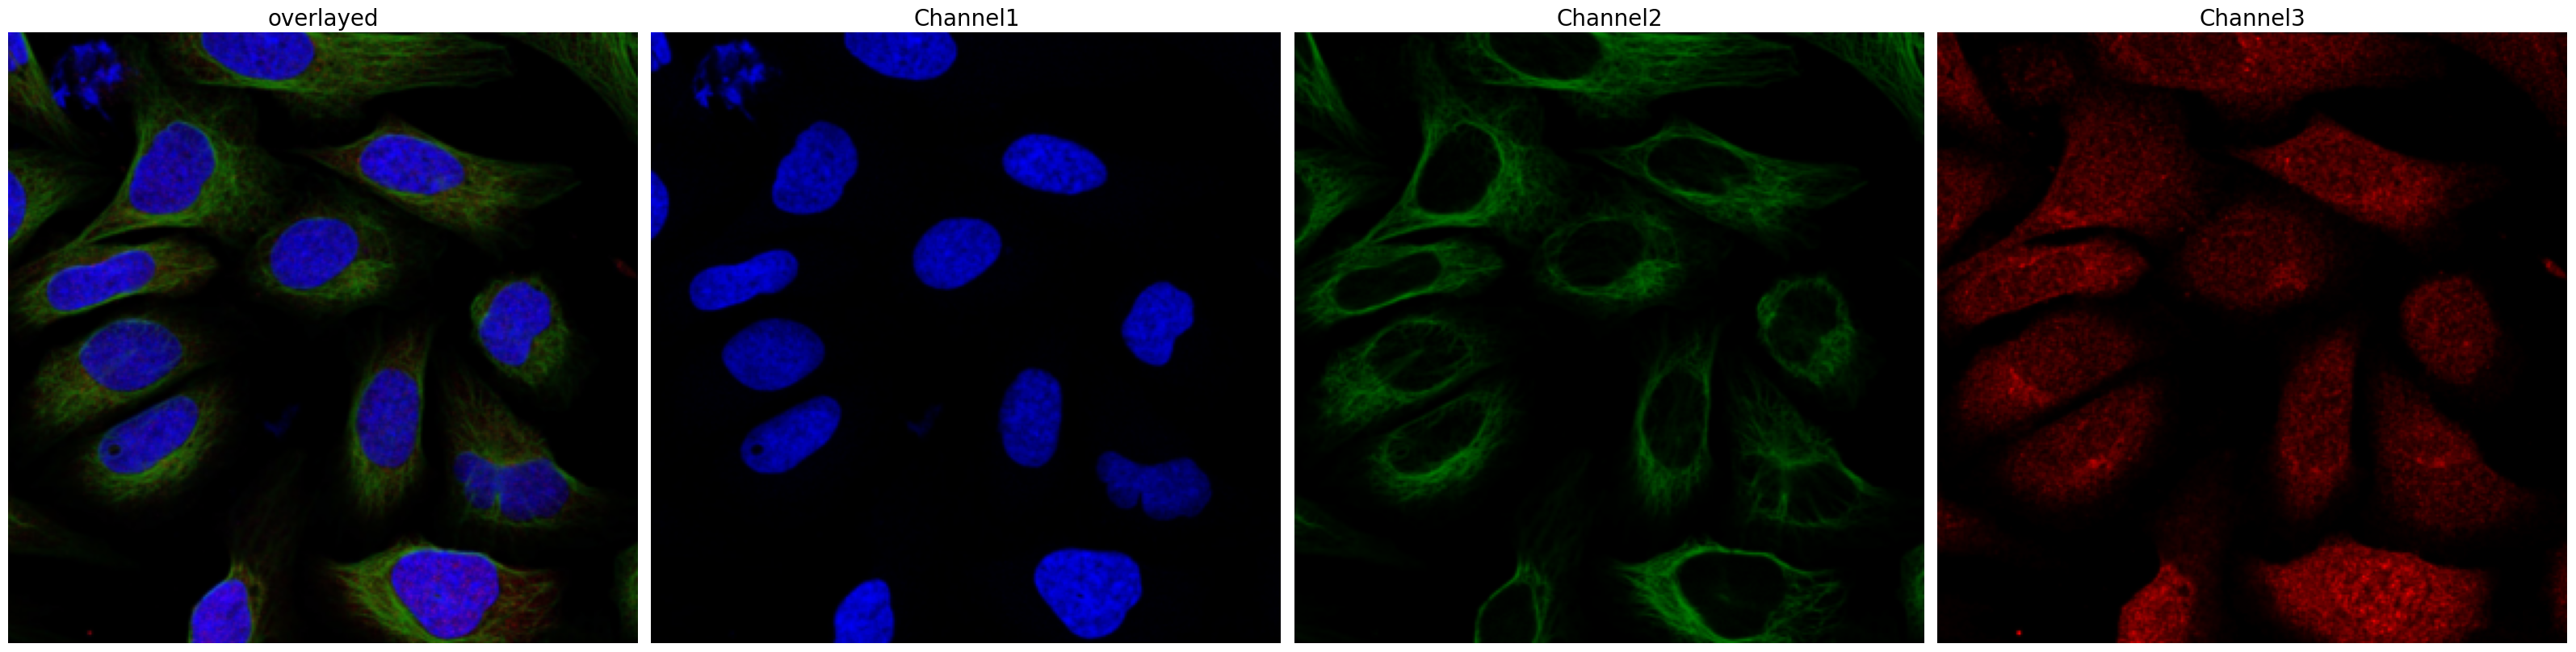

In [4]:
project.plot_input_image()

[10/04/2025 20:17:42] Smoothing Kernel size not explicitly defined. Will calculate a default value based on the downsampling factor.
[10/04/2025 20:17:42] Performing image padding to ensure that image is compatible with selected downsample kernel size of 2.
[10/04/2025 20:17:42] Downsampling image by a factor of 2x2
[10/04/2025 20:17:42] GPU Status for segmentation is True and will segment using the following device mps.
[10/04/2025 20:17:42] Segmenting nucleus using the following model: nuclei
[10/04/2025 20:17:44] Segmenting cytosol using the following model: cyto2
[10/04/2025 20:17:45] Performing filtering to match Cytosol and Nucleus IDs.
[10/04/2025 20:17:45] Removed 1 nuclei and 0 cytosols due to filtering.
[10/04/2025 20:17:45] After filtering, 9 matching nuclei and cytosol masks remain.
[10/04/2025 20:17:45] Total time to perform nucleus and cytosol mask matching filtering: 0.56 seconds
[10/04/2025 20:17:45] Segmentation seg_all_nucleus written to sdata object.
[10/04/2025 20:1

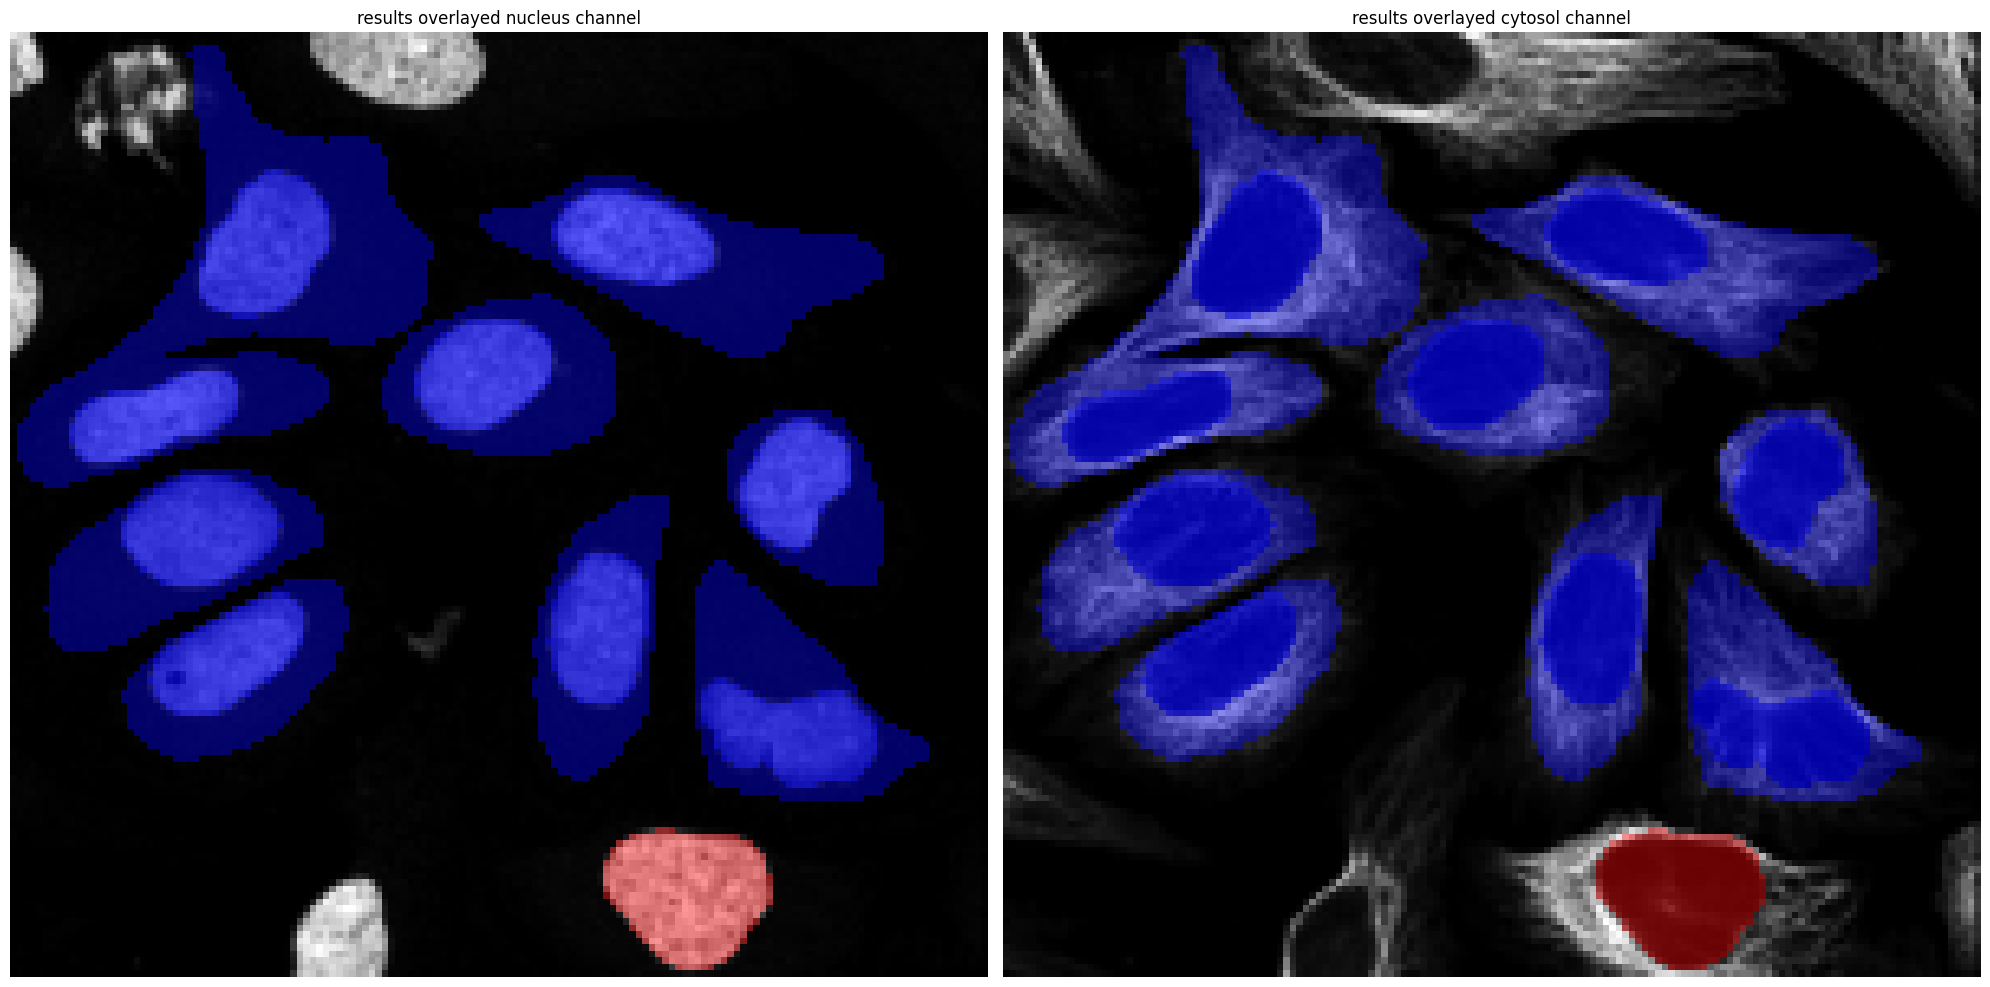

In [5]:
project.segment()

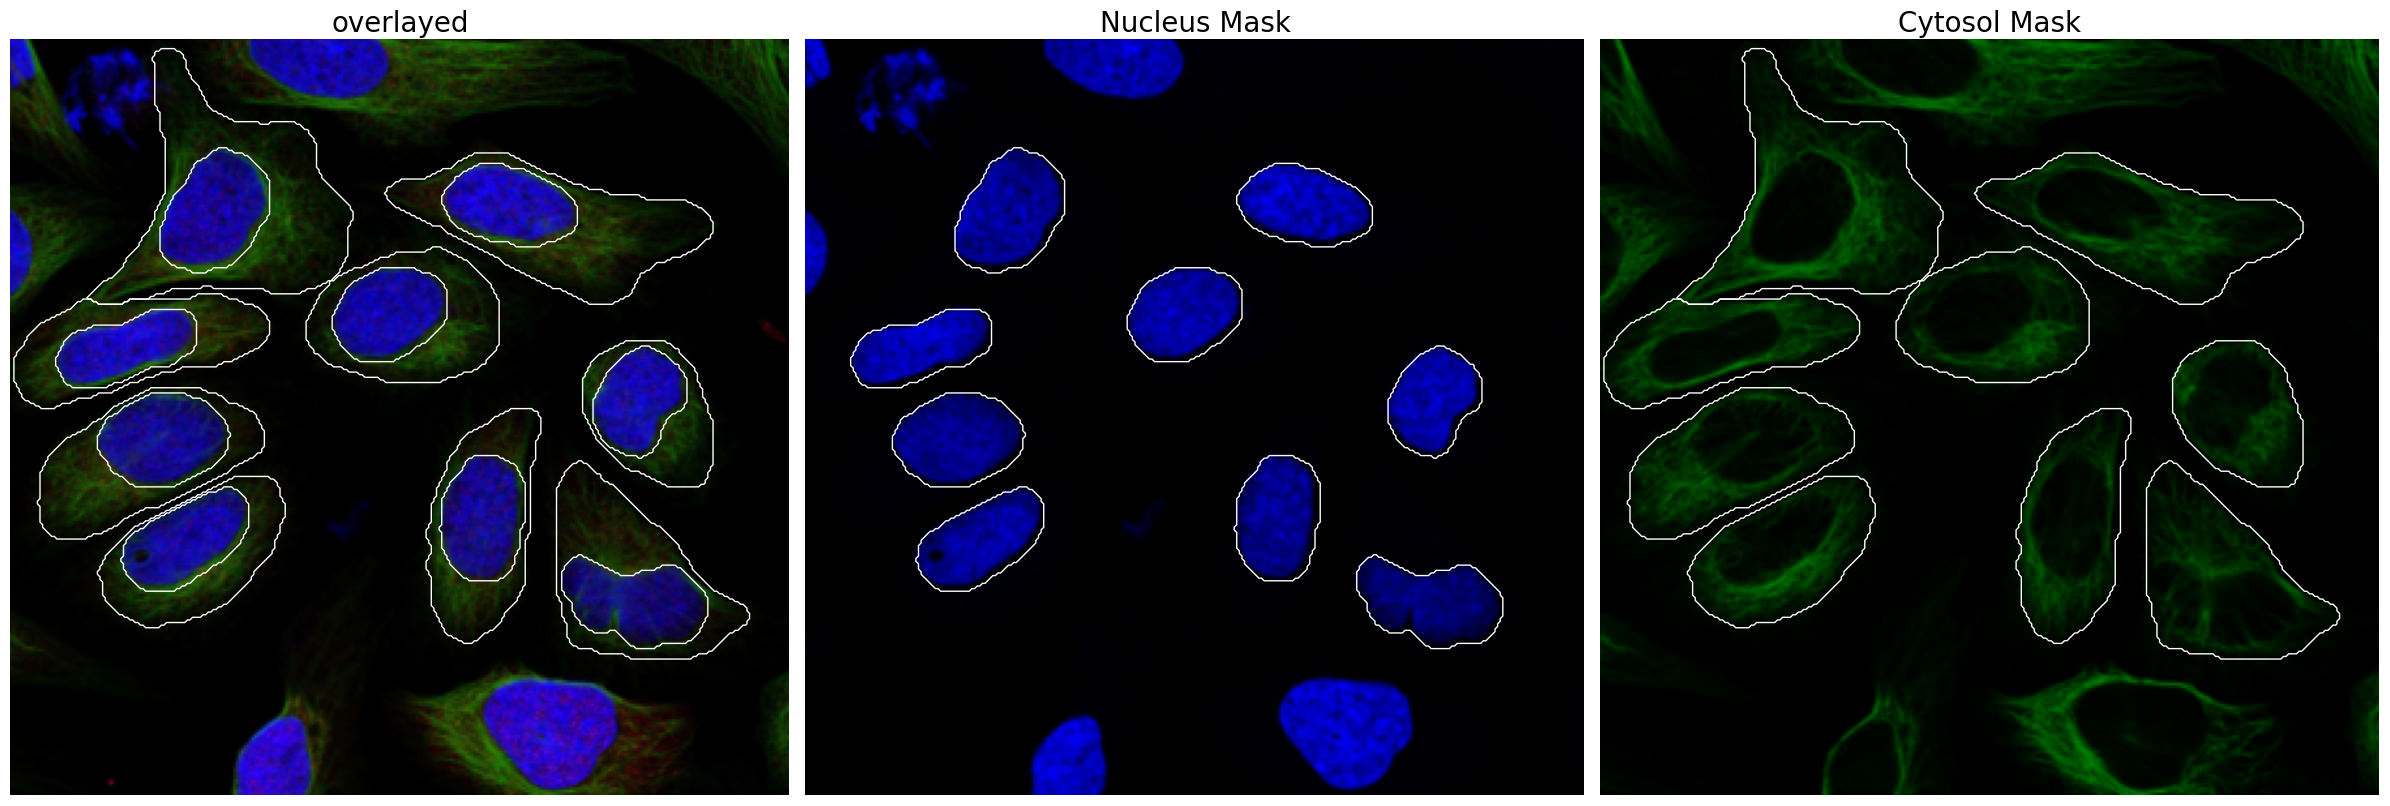

In [6]:
project.plot_segmentation_masks()

In [7]:
project.extract()

[10/04/2025 20:17:49] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_feoxg2pw for HDF5CellExtraction
[10/04/2025 20:17:49] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/extraction/data
[10/04/2025 20:17:49] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/extraction/data
[10/04/2025 20:17:49] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[10/04/2025 20:17:49] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[10/04/2025 20:17:49] A total of 1 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/ex

Extracting cell batches:   0%|          | 0/1 [00:00<?, ?it/s]

[10/04/2025 20:17:49] Finished extraction in 0.13 seconds (61.80 cells / second)
[10/04/2025 20:17:49] Benchmarking times saved to file.
[10/04/2025 20:17:49] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_feoxg2pw'>


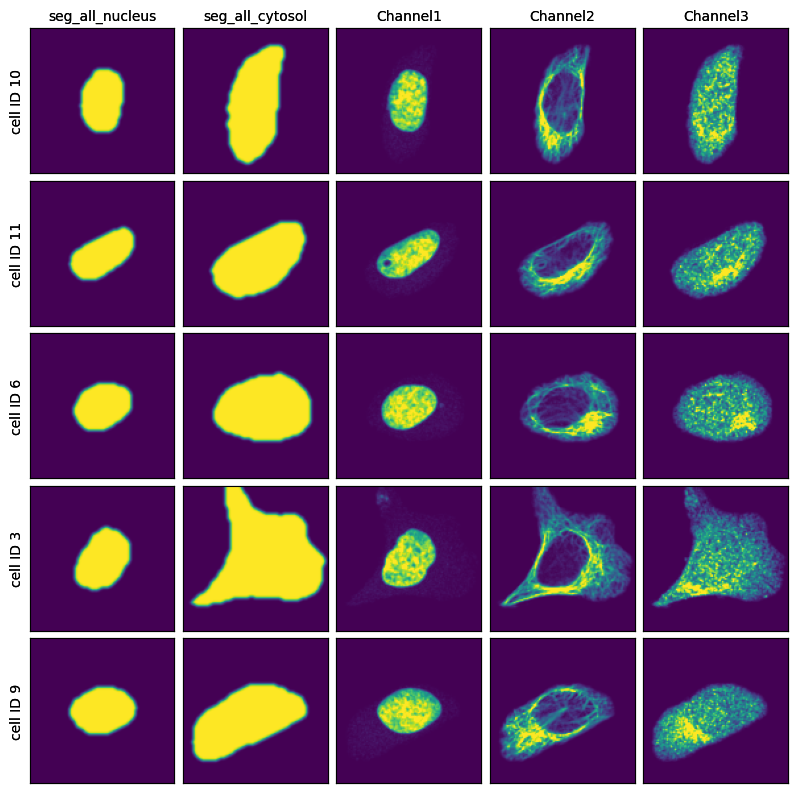

In [8]:
project.plot_single_cell_images()

In [9]:
project.featurize(overwrite = True)

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/extraction/data/single_cells.h5sc
[10/04/2025 20:17:50] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/CellFeaturizer_wm3n9zxk for CellFeaturizer
[10/04/2025 20:17:50] Started CellFeaturization of all available channels.
[10/04/2025 20:17:50] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/featurization/complete_CellFeaturizer
[10/04/2025 20:17:50] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[10/04/2025 20:17:50] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/CellFeaturizer_0sbatsj0 for CellFeaturizer
[10/04/2025 20:17:50] Reading dat

In [10]:
# load classification results
results = project.sdata['CellFeaturizer_cytosol'].to_df().merge(project.sdata['CellFeaturizer_cytosol'].obs, left_index=True, right_index=True).drop(columns = "region")
results

,nucleus_area,cytosol_area,cytosol_only_area,Channel1_mean_nucleus,Channel1_median_nucleus,Channel1_quant75_nucleus,Channel1_quant25_nucleus,Channel1_summed_intensity_nucleus,Channel1_summed_intensity_area_normalized_nucleus,Channel1_mean_cytosol,...,Channel3_quant25_cytosol,Channel3_summed_intensity_cytosol,Channel3_summed_intensity_area_normalized_cytosol,Channel3_mean_cytosol_only,Channel3_median_cytosol_only,Channel3_quant75_cytosol_only,Channel3_quant25_cytosol_only,Channel3_summed_intensity_cytosol_only,Channel3_summed_intensity_area_normalized_cytosol_only,scportrait_cell_id
0,2171.0,6501.0,4330.0,0.094401,0.0,0.024994,0.0,1142.256958,0.263801,0.094401,...,0.0,2089.672852,0.482603,0.172700,0.0,0.333252,0.0,2089.672852,0.482603,3
1,1912.0,4568.0,2656.0,0.074075,0.0,0.010139,0.0,896.308350,0.337465,0.074075,...,0.0,1762.530884,0.663603,0.145664,0.0,0.142822,0.0,1762.530884,0.663603,4
2,1888.0,3983.0,2095.0,0.079451,0.0,0.004189,0.0,961.353882,0.458880,0.079451,...,0.0,1475.200439,0.704153,0.121917,0.0,0.067871,0.0,1475.200439,0.704153,6
3,1718.0,3012.0,1294.0,0.067254,0.0,0.000000,0.0,813.767578,0.628878,0.067254,...,0.0,1150.541260,0.889135,0.095086,0.0,0.000000,0.0,1150.541260,0.889135,8
4,2096.0,4286.0,2190.0,0.086380,0.0,0.006791,0.0,1045.195679,0.477258,0.086380,...,0.0,1515.955566,0.692217,0.125286,0.0,0.106750,0.0,1515.955566,0.692217,9
5,1945.0,3873.0,1928.0,0.076503,0.0,0.000376,0.0,925.689514,0.480129,0.076503,...,0.0,1508.146729,0.782234,0.124640,0.0,0.006575,0.0,1508.146729,0.782234,10
6,1954.0,3678.0,1724.0,0.073058,0.0,0.000256,0.0,884.001404,0.512762,0.073058,...,0.0,1361.403076,0.789677,0.112513,0.0,0.003231,0.0,1361.403076,0.789677,11
7,2165.0,4542.0,2377.0,0.081356,0.0,0.015686,0.0,984.403809,0.414137,0.081356,...,0.0,1639.894287,0.689901,0.135528,0.0,0.181763,0.0,1639.894287,0.689901,12
